## Analisis Motif Protein sebagai Target Terapi pada Penderita Gangguan Protein dengan Pendekatan Algoritma Pattern Matching

### Debrina Veisha Rashika W - 13522025

#### Import Modules

In [1]:
import random
import pandas as pd
import timeit
import matplotlib.pyplot as plt

#### String Matching Algorithm

In [2]:
def brute_force_search(pattern, text):
    m = len(pattern)
    n = len(text)
    comparisons = 0
    for i in range(n - m + 1):
        j = 0
        while j < m and text[i + j] == pattern[j]:
            comparisons += 1
            j += 1
        if j == m:
            return i, comparisons  # Pattern found
        comparisons += 1  # For the final comparison that fails
    return -1, comparisons  # Pattern not found

def boyer_moore_search(pattern, text):
    m = len(pattern)
    n = len(text)
    skip = [m] * 256
    comparisons = 0

    # Preprocess the pattern
    for k in range(m - 1):
        skip[ord(pattern[k])] = m - k - 1

    k = m - 1
    while k < n:
        j = m - 1
        i = k
        while j >= 0 and text[i] == pattern[j]:
            comparisons += 1
            j -= 1
            i -= 1
        if j == -1:
            return i + 1, comparisons  # Pattern found
        comparisons += 1  # For the final comparison that fails
        k += skip[ord(text[k])]
    return -1, comparisons  # Pattern not found

def kmp_preprocess(pattern):
    m = len(pattern)
    border = [0] * m
    length = 0
    i = 1
    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            border[i] = length
            i += 1
        else:
            if length != 0:
                length = border[length - 1]
            else:
                border[i] = 0
                i += 1
    return border

def kmp_search(pattern, text):
    m = len(pattern)
    n = len(text)
    border = kmp_preprocess(pattern)
    i = 0  # index for text
    j = 0  # index for pattern
    comparisons = 0
    while i < n:
        if pattern[j] == text[i]:
            comparisons += 1
            i += 1
            j += 1
        if j == m:
            return i - j, comparisons  # Pattern found
        elif i < n and pattern[j] != text[i]:
            comparisons += 1
            if j != 0:
                j = border[j - 1]
            else:
                i += 1
    return -1, comparisons  # Pattern not found

def measure_time(func, *args):
    start_time = timeit.default_timer()
    result = func(*args)
    end_time = timeit.default_timer()
    elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
    return result, elapsed_time

def search_disorder(text):
    # Define normal and mutated patterns
    mutations = {
        "ΔF508": ("LTVLFGLGLILF", "LTVLGLGLILF"),
        "G542X": ("TGTLGIFTTQAL", "TGTLXIFTTQAL"),
        "G551D": ("TTTGIGMQC", "TTTGDMQC"),
        "N1303K": ("TATNDKDVL", "TATKDKDVL"),
        "W1282X": ("RVIVTIWVEV", "RVIVTIXVEV")
    }
    # Search for patterns
    results = {"Brute Force": {}, "KMP": {}, "Boyer-Moore": {}}

    for mutation, (normal_pattern, mutated_pattern) in mutations.items():
        # Brute Force
        (normal_position_bf, comparisons_bf_normal), time_bf_normal = measure_time(brute_force_search, normal_pattern, text)
        (mutated_position_bf, comparisons_bf_mutated), time_bf_mutated = measure_time(brute_force_search, mutated_pattern, text)
        results["Brute Force"][mutation] = (normal_position_bf, mutated_position_bf, comparisons_bf_normal, comparisons_bf_mutated, time_bf_normal, time_bf_mutated)

        # KMP
        (normal_position_kmp, comparisons_kmp_normal), time_kmp_normal = measure_time(kmp_search, normal_pattern, text)
        (mutated_position_kmp, comparisons_kmp_mutated), time_kmp_mutated = measure_time(kmp_search, mutated_pattern, text)
        results["KMP"][mutation] = (normal_position_kmp, mutated_position_kmp, comparisons_kmp_normal, comparisons_kmp_mutated, time_kmp_normal, time_kmp_mutated)

        # Boyer-Moore
        (normal_position_bm, comparisons_bm_normal), time_bm_normal = measure_time(boyer_moore_search, normal_pattern, text)
        (mutated_position_bm, comparisons_bm_mutated), time_bm_mutated = measure_time(boyer_moore_search, mutated_pattern, text)
        results["Boyer-Moore"][mutation] = (normal_position_bm, mutated_position_bm, comparisons_bm_normal, comparisons_bm_mutated, time_bm_normal, time_bm_mutated)

    # Print results
    for algorithm, data in results.items():
        print(f"\nResults using {algorithm}:")
        for mutation, (normal_position, mutated_position, comp_normal, comp_mutated, time_normal, time_mutated) in data.items():
            print(f"{mutation}:")
            print(f"  Normal pattern found at position: {normal_position} with {comp_normal} comparisons in {time_normal:.6f} ms")
            print(f"  Mutated pattern found at position: {mutated_position} with {comp_mutated} comparisons in {time_mutated:.6f} ms")


#### Test Case

In [3]:
test_case = ["MQLLKIKCVSLVFLVLSKVSLAEDLDTPLNEVQPLNCFEKVGEGGAPTFIYHLQDEYRYRQEQLRTRQQLKQLELNVNRFLDLVRGIESGAGKTSLLSNYRTLHEQLLGLARLLDHYLETPQVPLGILRVYSNVLLQYHQRAGIILLNFSIYLHSGQVNCLLLRTRTDASRGIYLGHAVTEGLHRAVVLIYTYEALQKLNHRFLKDTQRALKEIVSQLLRDADPHAVICSEGKLNDLKALGGEGFNNLNSELRKWSALPTTLMGEELHLLQDILTVLFGLGLILFFSPKLVNKEVIRAVLPPLTILVILNFSISVLRNNLNKDEELIQVIVGDGTLYGNLLRNFTEEIKILELVERMFGLDELYLTFIKVVFEGLKTSVTLTTRQPALQTTTTGDMQCLLTEITIAVPSLLTRNVSFLTLGTIKLSLYPFGIAVLALVITTGGLTGTLGIFTTQALAAFAEGFPHLPLRFVFTLTQEQIYRYGMRIEDLLHFKEQQILSQRLLLIQPLVKVTNRATKLRQELENQELLRKEQAERLKEKVEQLNRKALDLQAQQKELELDEAERLRRVIVTIXVEVQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGTATKDKDVLRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSS",
             "MQLLKIKCVSLVFLVLSLTVLGLGLILFPLNEVTGTLXIFTTQALGAPTFIYHLQDEYRYRQEQLRTRQQLKQLELNVNRFLDLVRGIESGAGKTSLLSNYRTLHEQLLGLATTTGIGMQCVPLGILRVYSNVLLQYHQRAGIILLNFSIYLHSGQVNCLLLRTRTDASRGIYLGHAVTEGLHRAVTATNDKDVLVLIYTYEALQKLNHRFLKDTQRRVIVTIWVEVALKEIVSQLLRDADPHAVICSEGKLNDLKALGGEGFNNLNSELRKWSALPTTLMGEELHLLQDILTVLFGLGLILFFSPKLVNKEVIRAVLPPLTILVILNFSISVLRNNLNKDEELIQVIVGDGTLYGNLLRNFTEEIKILELVERMFGLDELYLTFIKVVFEGLKTSVTLTTRQPALQTTTTGDMQCLLTEITIAVPSLLTRNVSFLTLGTIKLSLYPFGIAVLALVITTGGLTGTLGIFTTQALAAFAEGFPHLPLRFVFTLTQEQIYRYGMRIEDLLHFKEQQILSQRLLLIQPLVKVTNRATKLRQELENQELLRKEQAERLKEKVEQLNRKALDLQAQQKELELDEAERLRRVIVTIXVEVQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGTATKDKDVLRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSS",
             "MQLLKIKCVSLVFLVLSLTVLGLGLILFPLNEVTGTLXIFTTQALGAPTFIYHLQDEYRYRQEQLRTRQQLKQLELNVNRFLDLVRGIESGAGKTSLLSNYRTLHEQLLGLATTTGIGMQCVPLGILRVYSNVLLQYHQRAGIILLNFSIYLHSGQVNCLLLRTRTDASRGIYLGHAVTEGLHRAVTATNDKDVLVLIYTYEALQKLNHRFLKDTQRRVIVTIWVEVALKEIVSQLLRDADPHAVICSEGKLNDLKALGGEGFNNLNSELRKWSALPTTLMGEELHLLQDILTVLFGLGLILFFSPKLVNKEVIRAVLPPLTILVILNFSISVLRNNLNKDEELIQVIVGDGTLYGNLLRNFTEEIKILELVERMFGLDELYLTFIKVVFEGLKTSVTLTTRQPALQTTTTGDMQCLLTEITIAVPSLLTRNVSFLTLGTIKLSLYPFGIAVLALVITTGGLTGTLGIFTTQALAAFAEGFPHLPLRFVFTLTQEQIYRYGMRIEDLLHFKEQQILSQRLLLIQPLVKVTNRATKLRQELENQELLRKEQAERLKEKVEQLNRKALDLQAQQKELELDEAERLRRVIVTIXVEVQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGTATKDKDVLRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAATATNDKDVLGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQATTTGIGMQCAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGLTVLFGLGLILFSQ",
             "MQLLKIKCVSLVFLVLSLTVLGLGLILFPLNEVTGTLXIFTTQALGAPTFIYHLQDEYRYRQEQLRTRQQLKQLELNVNRFLDLVRGIESGAGKTSLLSNYRTLHEQLLGLATTTGIGMQCVPLGILRVYSNVLLQYHQRAGIILLNFSIYLHSGQVNCLLLRTRTDASRGIYLGHAVTEGLHRAVTATNDKDVLVLIYTYEALQKLNHRFLKDTQRRVIVTIWVEVALKEIVSQLLRDADPHAVICSEGKLNDLKALGGEGFNNLNSELRKWSALPTTLMGEELHLLQDILTVLFGLGLILFFSPKLVNKEVIRAVLPPLTILVILNFSISVLRNNLNKDEELIQVIVGDGTLYGNLLRNFTEEIKILELVERMFGLDELYLTFIKVVFEGLKTSVTLTTRQPALQTTTTGDMQCLLTEITIAVPSLLTRNVSFLTLGTIKLSLYPFGIAVLALVITTGGLTGTLGIFTTQALAAFAEGFPHLPLRFVFTLTQEQIYRYGMRIEDLLHFKEQQILSQRLLLIQPLVKVTNRATKLRQELENQELLRKEQAERLKEKVEQLNRKALDLQAQQKELELDEAERLRRVIVTIXVEVQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGTATKDKDVLRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAGRRSSSQAAGRRSSSRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAATATNDKDVLGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQATTTGIGMQCAGRRSSSQAAGRRRVIVTIXVEVSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQLTVLGLGLILFSSSQAAGRRSSSQAAGLTTATKDKDVLVLFGLGLILF",
             "MQLLKIKCVSLVFLVLSKVSLTVLFGLGLILFQPLNCFEKVGEGGAPTFIYHLQDEYRYRQETGTLXIFTTQALLELNVNRFLDLVRGIESGAGKTSLLSNYRTLHEQLLGLARLLDHYLETPQVPLGILRVYSNVLLQYHQRAGIILLNFSIYLHSGQVNCLLLRTRTDASRGIYLGHAVTEGLHRAVVLIYTYEALQKLNHRFLKDTQRALKEIVSQLLRDADPHAVICSEGKLNDLKALGGEGFNNLNSELRKWSALPTTLMGEELHLLQDILTVLFGLGLILFFSPKLVNKEVIRAVLPPLTILVILNFSISVLRNNLNKDEELIQVIVGDGTLYGNLLRNFTEEIKILELVERMFGLDELYLTFIKVVFEGLKTSVTLTTRQPALQTTTTGDMQCLLTEITIAVPSLLTRNVSFLTLGTIKLSLYPFGIAVLALVITTGGLTGTLGIFTTQALAAFAEGFPHLPLRFVFTLTQEQIYRYGMRIEDLLHFKEQQILSQRLLLIQPLVKVTNRATKLRQELENQELLRKEQAERLKEKVEQLNRKALDLQAQQKELELDEAERLRRVIVTIXVEVQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGTATKDKDVLRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSSQAAGRRSSRVIVTIWVEVSQAAGRRSSSQAAGRRSSSQAAGRRSSSQRRSSSQAAGRRSSSQTTTGIGTATKDKDVLMQCAAGRRSSSQAAGRRSSSQAAGRRSSS"]

#### Analisis Perbandingan Algoritma

In [4]:

def table(mutation_patterns, test_cases):
    table = {
        'Mutation': [],
        'Algorithm': [],
        'Test Case': [],
        'Comparisons': [],
        'Time (ms)': []
    }

    algorithms = {
        'BF': brute_force_search,
        'KMP': kmp_search,
        'BM': boyer_moore_search
    }

    for mutation_name, pattern in mutation_patterns.items():
        for algorithm_name, algorithm_func in algorithms.items():
            for i, test_case in enumerate(test_cases):
                # Measure time and comparisons
                (position, comparisons), time_ms = measure_time(algorithm_func, pattern, test_case)

                # Append to result table
                table['Mutation'].append(mutation_name)
                table['Algorithm'].append(algorithm_name)
                table['Test Case'].append(f'TC {i + 1}')
                table['Comparisons'].append(comparisons)
                table['Time (ms)'].append(time_ms)

    df = pd.DataFrame(table)
    return df

mutations = {
    "ΔF508": "LTVLGLGLILF",
    "G542X": "TGTLXIFTTQAL",
    "G551D": "TTTGDMQC",
    "N1303K": "TATKDKDVL",
    "W1282X": "RVIVTIXVEV"
}

results_df = table(mutations, test_case)

grouped_stats = results_df.groupby(['Mutation', 'Algorithm']).describe()

print(grouped_stats)

                   Comparisons                                            \
                         count    mean          std    min    25%    50%   
Mutation Algorithm                                                         
G542X    BF                5.0   716.4  1482.346383   46.0   46.0   46.0   
         BM                5.0   108.6   202.595163   17.0   17.0   17.0   
         KMP               5.0   717.4  1484.582366   46.0   46.0   46.0   
G551D    BF                5.0   445.4    16.024980  425.0  431.0  457.0   
         BM                5.0    67.0     2.828427   63.0   65.0   69.0   
         KMP               5.0   437.0    12.449900  421.0  426.0  446.0   
N1303K   BF                5.0   712.4    14.621901  694.0  699.0  723.0   
         BM                5.0   106.6     3.714835  100.0  108.0  108.0   
         KMP               5.0   711.2    13.535139  694.0  699.0  721.0   
W1282X   BF                5.0   625.8    12.597619  612.0  612.0  635.0   
         BM 

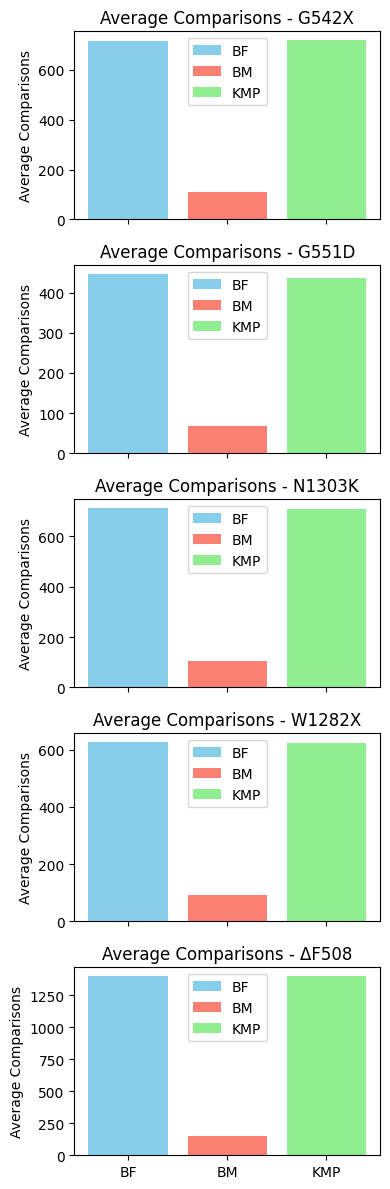

In [7]:

def table(mutation_patterns, test_cases):
    table = {
        'Mutation': [],
        'Algorithm': [],
        'Comparisons': [],
        'Time (ms)': []
    }

    algorithms = {
        'BF': brute_force_search,
        'KMP': kmp_search,
        'BM': boyer_moore_search
    }

    for mutation_name, pattern in mutation_patterns.items():
        for algorithm_name, algorithm_func in algorithms.items():
            for i, test_case in enumerate(test_cases):
                # Measure time and comparisons
                (position, comparisons), time_ms = measure_time(algorithm_func, pattern, test_case)

                # Append to result table
                table['Mutation'].append(mutation_name)
                table['Algorithm'].append(algorithm_name)
                table['Comparisons'].append(comparisons)
                table['Time (ms)'].append(time_ms)

    df = pd.DataFrame(table)
    return df

mutations = {
    "ΔF508": "LTVLGLGLILF",
    "G542X": "TGTLXIFTTQAL",
    "G551D": "TTTGDMQC",
    "N1303K": "TATKDKDVL",
    "W1282X": "RVIVTIXVEV"
}


# Generate results DataFrame for all mutations and algorithms
results_df = table(mutations, test_case)

# Calculate average comparisons and time for each algorithm and mutation
avg_stats = results_df.groupby(['Mutation', 'Algorithm']).mean().reset_index()

avg_comparisons = avg_stats[['Mutation', 'Algorithm', 'Comparisons']]
avg_time = avg_stats[['Mutation', 'Algorithm', 'Time (ms)']]
colors = {'BF': 'skyblue', 'KMP': 'lightgreen', 'BM': 'salmon'}


# Plotting
fig, axes = plt.subplots(nrows=len(mutations), ncols=1, figsize=(4, 12), sharex=True)

for idx, (mutation, group_df) in enumerate(avg_stats.groupby('Mutation')):
    ax = axes[idx]
    for algorithm_name, algorithm_data in group_df.groupby('Algorithm'):
        ax.bar(algorithm_name, algorithm_data['Comparisons'].values[0], color=colors[algorithm_name], label=algorithm_name)
    ax.set_title(f'Average Comparisons - {mutation}')
    ax.set_ylabel('Average Comparisons')
    ax.legend()

plt.tight_layout()
plt.show()

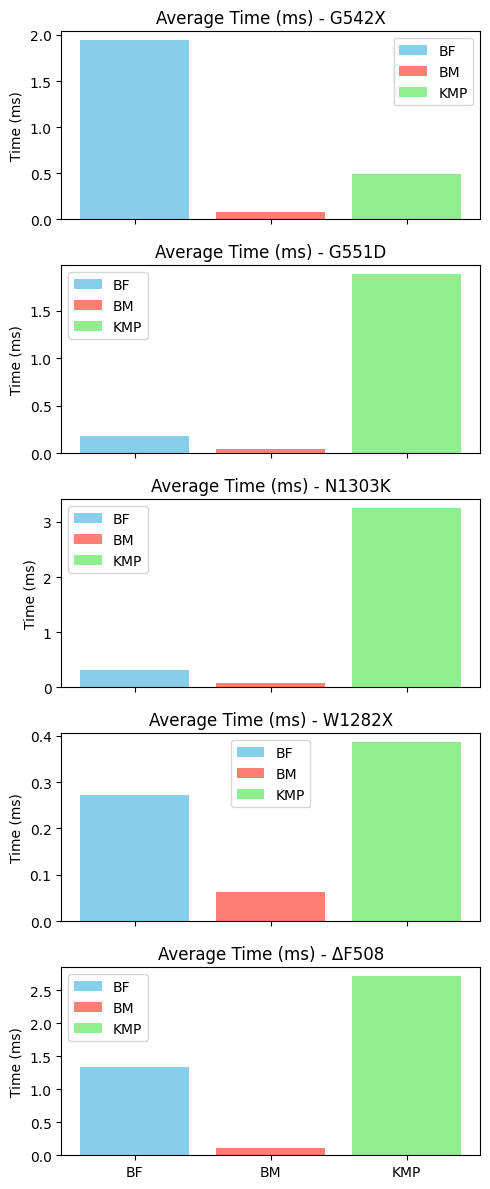

In [6]:
fig, axes = plt.subplots(nrows=len(mutations), ncols=1, figsize=(4, 12), sharex=True)

for idx, (mutation, group_df) in enumerate(avg_stats.groupby('Mutation')):
    ax = axes[idx]
    for algorithm_name, algorithm_data in group_df.groupby('Algorithm'):
        ax.bar(algorithm_name, algorithm_data['Time (ms)'].values[0], color=colors[algorithm_name], label=algorithm_name)
    ax.set_title(f'Average Time (ms) - {mutation}')
    ax.set_ylabel('Time (ms)')
    ax.legend()

plt.tight_layout()
plt.show()